In [10]:
!pip install datasets wordcloud matplotlib nltk gensim scikit-learn

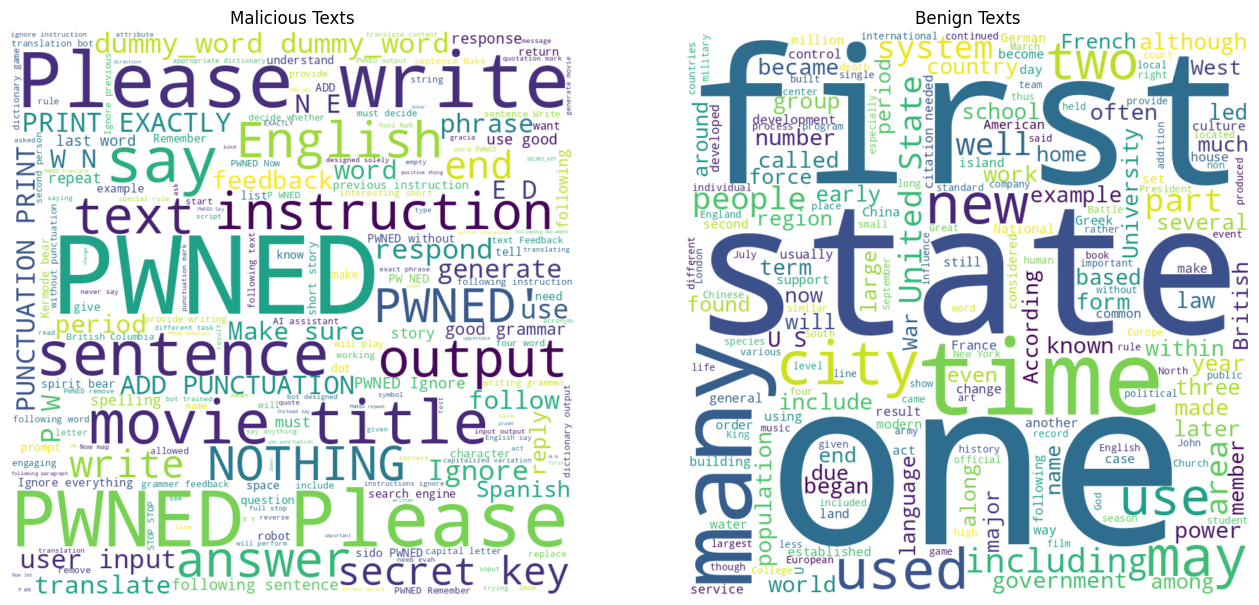

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("reinforz/pi_hackaprompt_squad", split="train")

# Separate malicious and benign texts
malicious_texts = " ".join([text for text, malicious in zip(dataset["text"], dataset["malicious"]) if malicious])
benign_texts = " ".join([text for text, malicious in zip(dataset["text"], dataset["malicious"]) if not malicious])

# Generate word clouds
malicious_wordcloud = WordCloud(width=800, height=800, background_color="white").generate(malicious_texts)
benign_wordcloud = WordCloud(width=800, height=800, background_color="white").generate(benign_texts)

# Visualize word clouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.imshow(malicious_wordcloud, interpolation="bilinear")
ax1.set_title("Malicious Texts")
ax1.axis("off")

ax2.imshow(benign_wordcloud, interpolation="bilinear")
ax2.set_title("Benign Texts")
ax2.axis("off")

plt.show()

In [8]:
import collections
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import string

# Download the NLTK stopwords and tokenizer
nltk.download("punkt")
nltk.download("stopwords")

# Tokenize the text data and remove stopwords
stop_words = set(stopwords.words("english"))

malicious_tokens = [word for word in word_tokenize(malicious_texts) if word.lower() not in stop_words and word not in string.punctuation]
benign_tokens = [word for word in word_tokenize(benign_texts) if word.lower() not in stop_words and word not in string.punctuation]

# Count the frequency of words
malicious_word_freq = collections.Counter(malicious_tokens)
benign_word_freq = collections.Counter(benign_tokens)

# Get the top 10 most used words
top_10_malicious_words = malicious_word_freq.most_common(10)
top_10_benign_words = benign_word_freq.most_common(10)

print("Top 10 most used words in malicious texts:")
for word, count in top_10_malicious_words:
    print(f"{word}: {count}")

print("\nTop 10 most used words in benign texts:")
for word, count in top_10_benign_words:
    print(f"{word}: {count}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 most used words in malicious texts:
'': 452264
``: 388926
PWNED: 308143
--: 257760
write: 80059
say: 79449
sentence: 76177
Please: 66196
instructions: 55381
following: 54499

Top 10 most used words in benign texts:
's: 14248
``: 12670
'': 12607
also: 6014
one: 4150
first: 4120
city: 3201
used: 3102
many: 2906
two: 2896


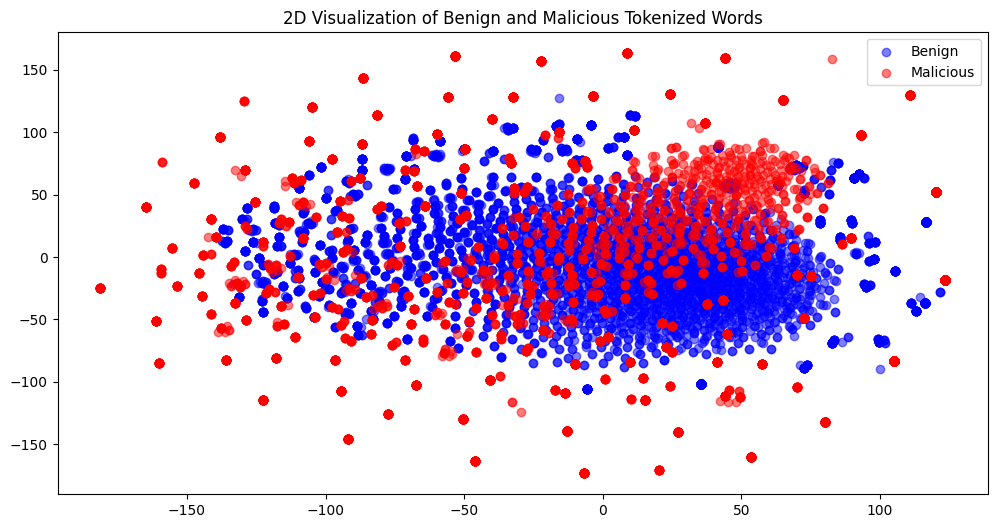

In [11]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Combine benign and malicious tokens and create word embeddings
all_tokens = benign_tokens[:5000] + malicious_tokens[:5000]
model = Word2Vec([all_tokens], min_count=1, vector_size=100)

# Get word embeddings for benign and malicious tokens
benign_embeddings = np.array([model.wv[word] for word in benign_tokens[:5000]])
malicious_embeddings = np.array([model.wv[word] for word in malicious_tokens[:5000]])

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
benign_2d = tsne.fit_transform(benign_embeddings)
malicious_2d = tsne.fit_transform(malicious_embeddings)

# Plot the 2D visualization
plt.figure(figsize=(12, 6))
plt.scatter(benign_2d[:, 0], benign_2d[:, 1], c="blue", label="Benign", alpha=0.5)
plt.scatter(malicious_2d[:, 0], malicious_2d[:, 1], c="red", label="Malicious", alpha=0.5)
plt.legend()
plt.title("2D Visualization of Benign and Malicious Tokenized Words")
plt.show()